<h1>Neural Networks</h1>

<h3>Part 1: Load all the required libraries</h3>

In [6]:
#install the required libraries
#install.packages('NeuralNetTools')
#install.packages('nnet')
#install.packages('RColorBrewer')


#load the required libraries
library(NeuralNetTools)
library(nnet)
library(RColorBrewer)
library(caret)

Loading required package: lattice


Loading required package: ggplot2


<h3>Part 2: Read and prepare the dataset</h3>

In [7]:
#read the dataset
data <- read.delim("data.csv",header=T,sep=',')

#remove the NA column
data <- subset( #this function is used to subset a dataset
  data, #give it the data you want to subset
  select=-X #give it the feature that you want to include or exclude. - means exclude
  )

#remove the id column
data <- subset(
  data,
  select=-id
  )

#change the label to factor and move it to last column
diagnosis <- as.factor(data$diagnosis)
data <- subset(
  data,
  select=-diagnosis
  )
data$diagnosis <- diagnosis

head(data)

radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave.points_mean symmetry_mean fractal_dimension_mean ⋯ texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst diagnosis 
 
 17.99 10.38 122.80 1001.0 0.11840 0.27760 0.3001 0.14710 0.2419 0.07871 ⋯ 17.33 184.60 2019.0 0.1622 0.6656 0.7119 0.2654 0.4601 0.11890 M 
 20.57 17.77 132.90 1326.0 0.08474 0.07864 0.0869 0.07017 0.1812 0.05667 ⋯ 23.41 158.80 1956.0 0.1238 0.1866 0.2416 0.1860 0.2750 0.08902 M 
 19.69 21.25 130.00 1203.0 0.10960 0.15990 0.1974 0.12790 0.2069 0.05999 ⋯ 25.53 152.50 1709.0 0.1444 0.4245 0.4504 0.2430 0.3613 0.08758 M 
 11.42 20.38 77.58 386.1 0.14250 0.28390 0.2414 0.10520 0.2597 0.09744 ⋯ 26.50 98.87 567.7 0.2098 0.8663 0.6869 0.2575 0.6638 0.17300 M 
 20.29 14.34 135.10 1297.0 0.10030 0.13280 0.1980 0.10430 0.1809 0.05883 ⋯ 16.67 152.20 1575.0 0.1374 0.2050 0.4000 0.1625 0.2364 0.07678 M 
 12.45 15.70 82.57 477.1 0.12780 0.17000 0.1578 0.08089 0.2087 0.07613 ⋯ 23.75 103.40 741.6 0.1791 0.5249 0.5355 0.1741 0.3985 0.12440 M

<h3>Part 3: Prepare the train and test data</h3>

In [8]:
#set seed for reproducible results
set.seed(1234)

#split to train and test
idx <- sample.int( #this function generates a random set of integer numbers
  nrow(data), #the numbers you want to sample from
  nrow(data) * 0.7 #the numbers you want to sample
  )

train <- data[idx, ]  # keep the 70% sample. we will use this as a training set 
test  <- data[-idx, ] # discard the 70% sample, this leaves us with the rest 30% test set

#let's check the new dimensions of the train and test sets
dim(train)
dim(test)

# for neural networks standardizing the inputs can decrease training time as well as the chance that the algorithm finds a local minimum when optimizing.

# standardize inputs: transform on the train set and use calculations on the test set
scaled_mat <- scale(
    train[,1:30], 
    center = TRUE, 
    scale = TRUE
    )
train_scaled <- data.frame(scaled_mat)
train_scaled$diagnosis <- as.factor(train$diagnosis)
head(train)
head(train_scaled)

test_scaled <- data.frame( scale(
    test[,1:30], 
    center = attributes(scaled_mat)$'scaled:center', 
    scale = attributes(scaled_mat)$'scaled:scale'
    ))
test_scaled$diagnosis <- as.factor(test$diagnosis)
head(test)
head(test_scaled)

398 
 31

171 
 31

radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave.points_mean symmetry_mean fractal_dimension_mean ⋯ texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst diagnosis 
 
 65 12.68 23.84 82.69 499.0 0.11220 0.12620 0.11280 0.06873 0.1905 0.06590 ⋯ 33.47 111.80 888.3 0.1851 0.4061 0.40240 0.17160 0.3383 0.10310 M 
 354 15.08 25.74 98.00 716.6 0.10240 0.09769 0.12350 0.06553 0.1647 0.06464 ⋯ 33.22 121.20 1050.0 0.1660 0.2356 0.40290 0.15260 0.2654 0.09438 M 
 346 10.26 14.71 66.20 321.6 0.09882 0.09159 0.03581 0.02037 0.1633 0.07005 ⋯ 19.48 70.89 357.1 0.1360 0.1636 0.07162 0.04074 0.2434 0.08488 B 
 353 25.73 17.46 174.20 2010.0 0.11490 0.23630 0.33680 0.19130 0.1956 0.06121 ⋯ 23.58 229.30 3234.0 0.1530 0.5937 0.64510 0.27560 0.3690 0.08815 M 
 487 14.64 16.85 94.21 666.0 0.08641 0.06698 0.05192 0.02791 0.1409 0.05355 ⋯ 25.44 106.00 831.0 0.1142 0.2070 0.24370 0.07828 0.2455 0.06596 B 
 362 13.30 21.57 85.24 546.1 0.08582 0.06373 0.03344 0.02424 0.1815 0.05696 ⋯ 29.20 92.94 621.2 0.1140 0.1667 0.12120 0.05614 0.2637 0.06658 B

radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave.points_mean symmetry_mean fractal_dimension_mean ⋯ texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst diagnosis 
 
 65 -0.3836444 1.1363172 -0.3520389 -0.42387081 1.2386018 0.48123664 0.3971650 0.5818528 0.41680306 0.4648046 ⋯ 1.34090017 0.20438984 0.08426101 2.3700458 1.08305535 0.72520278 0.9362100 0.8310058 1.1447703 M 
 354 0.3387261 1.5836671 0.3169106 0.25425859 0.4947992 -0.07329373 0.5431599 0.4954039 -0.55261880 0.2815864 ⋯ 1.29983700 0.50103539 0.39700802 1.5190796 -0.06062933 0.72777069 0.6380515 -0.3884752 0.6465823 M 
 346 -1.1120346 -1.0133167 -1.0725469 -0.97672078 0.2230836 -0.19194105 -0.6533159 -0.7246060 -0.60522308 1.0682615 ⋯ -0.95699464 -1.08664950 -0.94314293 0.1824834 -0.54359294 -0.97362211 -1.1173171 -0.7564942 0.1038317 B 
 353 3.5442450 -0.3658366 3.6463651 4.28501483 1.4435270 2.62272361 3.4535064 3.8931152 0.60843296 -0.2171743 ⋯ -0.28355870 3.91245929 4.62112359 0.9398879 2.34144388 1.97166509 2.5682352 1.3445595 0.2906522 M 
 487 0.2062915 -0.5094595 0.1513117 0.09656857 -0.7188134 -0.67061494 -0.4335049 -0.5209108 -1.44689167 -1.3310248 ⋯ 0.02195125 0.02135322 -0.02656400 -0.7887764 -0.25247321 -0.08985106 -0.5282188 -0.7213651 -0.9770989 B 
 362 -0.1970320 0.6018518 -0.2406202 -0.27708820 -0.7635933 -0.73382867 -0.6856531 -0.6200569 0.07863265 -0.8351723 ⋯ 0.63954128 -0.39079476 -0.43234214 -0.7976871 -0.52279868 -0.71898840 -0.8756518 -0.4169130 -0.9416773 B

radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave.points_mean symmetry_mean fractal_dimension_mean ⋯ texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst diagnosis 
 
 3 19.69 21.25 130.00 1203.0 0.10960 0.1599 0.19740 0.12790 0.2069 0.05999 ⋯ 25.53 152.50 1709.0 0.1444 0.4245 0.4504 0.2430 0.3613 0.08758 M 
 4 11.42 20.38 77.58 386.1 0.14250 0.2839 0.24140 0.10520 0.2597 0.09744 ⋯ 26.50 98.87 567.7 0.2098 0.8663 0.6869 0.2575 0.6638 0.17300 M 
 12 15.78 17.89 103.60 781.0 0.09710 0.1292 0.09954 0.06606 0.1842 0.06082 ⋯ 27.28 136.50 1299.0 0.1396 0.5609 0.3965 0.1810 0.3792 0.10480 M 
 14 15.85 23.95 103.70 782.7 0.08401 0.1002 0.09938 0.05364 0.1847 0.05338 ⋯ 27.66 112.00 876.5 0.1131 0.1924 0.2322 0.1119 0.2809 0.06287 M 
 16 14.54 27.54 96.73 658.8 0.11390 0.1595 0.16390 0.07364 0.2303 0.07077 ⋯ 37.13 124.10 943.2 0.1678 0.6577 0.7026 0.1712 0.4218 0.13410 M 
 19 19.81 22.15 130.00 1260.0 0.09831 0.1027 0.14790 0.09498 0.1582 0.05395 ⋯ 30.88 186.80 2398.0 0.1512 0.3150 0.5372 0.2388 0.2768 0.07615 M

radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave.points_mean symmetry_mean fractal_dimension_mean ⋯ texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst diagnosis 
 
 3 1.7262793 0.5265087 1.7151067 1.77007723 1.04126642 1.13671449 1.5514797 2.1803467 1.0330247 -0.3945761 ⋯ 0.03673399 1.4888020 1.6715923 0.5567304 1.2064794 0.9717219 2.0566580603 1.2157529 0.2580872 M 
 4 -0.7628888 0.3216695 -0.5753134 -0.77571276 3.53831796 3.54856176 2.1518325 1.5670999 3.0169578 5.0510767 ⋯ 0.19605908 -0.2036556 -0.5358175 3.4705100 4.1699978 2.1863422 2.2842000339 6.2760136 5.1382720 M 
 12 0.5494175 -0.2645943 0.5615949 0.45495497 0.09253862 0.53958778 0.2162405 0.5097220 0.1800838 -0.2738847 ⋯ 0.32417616 0.9838734 0.8786036 0.3428750 2.1214271 0.6949015 1.0837199659 1.5151865 1.2418940 M 
 14 0.5704866 1.1622164 0.5659642 0.46025286 -0.90096912 -0.02447327 0.2140574 0.1741923 0.1988710 -1.3557447 ⋯ 0.38659217 0.2107014 0.0614384 -0.8377850 -0.3504075 -0.1489129 -0.0006352328 -0.1291891 -1.1536357 M 
 16 0.1761927 2.0074723 0.2614196 0.07413047 1.36762878 1.12893434 1.0943929 0.7144978 1.9122678 1.1729576 ⋯ 1.94206492 0.5925537 0.1904441 1.5992754 2.7707449 2.2669745 0.9299329768 2.2278050 2.9158512 M 
 19 1.7623979 0.7384113 1.7151067 1.94771223 0.18437547 0.02415268 0.8760828 1.2910038 -0.7968530 -1.2728603 ⋯ 0.91548576 2.5712427 3.0042002 0.8596922 0.4719722 1.4175106 1.9907493506 -0.1977745 -0.3949275 M

<h3>Part 4a: Neural Network | Model Training</h3>

Now that we have created our training and testing datasets, we can start training our model. The rule of thumb is to set the size of the hidden layer to be the square root of the number of features. In our data set that is 5. Let us explore the parameter size, which is the number of nodes in the hidden layer.

In [9]:
floor(sqrt(30))

5

In [10]:
#set up a list to store your trained models
model_nnet_list <- list()

#in a loop fit 25 models, one for each hidden layer size
for(size_use in 1:25){
    #show output of iterations for model 1 only
    if(size_use==1){trace=TRUE}else{trace=FALSE}
    set.seed(1234);
    model_nnet_list[[size_use]] <- nnet( #fit single-hidden-layer neural network
        formula = diagnosis ~ ., #the . notation indicates include all variables in the data as features
        data    = train_scaled, #data frame containing the variables in the formula
        size    = size_use, #number of units in the hidden layer
        decay   = 0.01, #weight decay, for regularization
        rang    = 0.6,#initial random weights on [-rang, rang]
        trace   = trace,#show iterations
        maxit   = 200#maximum number of iterations
        )
    }

# weights:  33


initial  value 257.863979 
iter  10 value 55.528871
iter  20 value 35.379013
iter  30 value 21.402967
iter  40 value 14.943263
iter  50 value 10.809916
iter  60 value 10.614514
iter  70 value 10.604750
iter  80 value 10.603735
iter  90 value 10.603652
iter 100 value 10.603638
final  value 10.603635 
converged


<h3>Part 4b: Neural Network | Prediction</h3>
Now that we have created several model fits, let us see how well each of the above models is at predicting the class in the test dataset.

In [11]:
#set up a list to store the predictions of the models
pred_nnet_list <- list()

#in a loop for each model predict the classes in the test data set
for(size_use in 1:25){
    pred_nnet_list[[size_use]] <- predict(
            model_nnet_list[[size_use]],
            test_scaled[,1:30], #exclude the 'diagnosis' column
            type = "class" #gives class_values (1 or 0 )
            )
    }


#let's look at the M and B classes predicted for a few select models
table(pred_nnet_list[[1]])
table(pred_nnet_list[[2]])
table(pred_nnet_list[[5]])
table(pred_nnet_list[[25]])
table(test_scaled$diagnosis)



 B  M 
98 73 


 B  M 
97 74 


  B   M 
101  70 


  B   M 
100  71 


  B   M 
101  70 

<h3>Part 4c: Neural Network | Accuracy</h3>
Lets try to quantify the accuracy of the predictions in the test set.

18

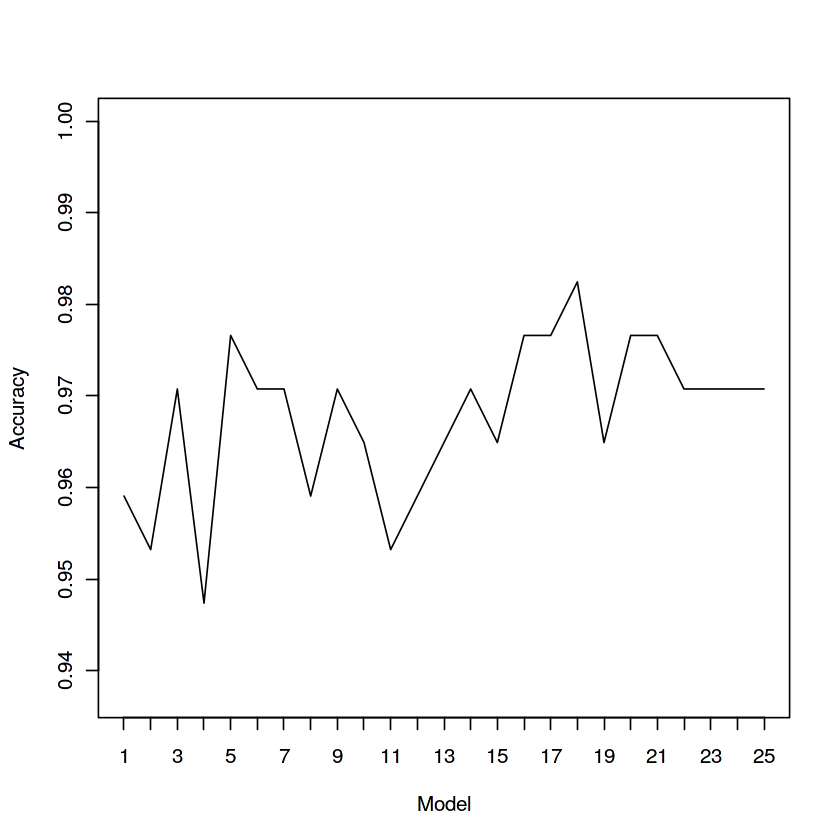

In [12]:
#set up a list to store the performance of the models
performance_nnet_list <- list()

#in a loop for each model calculate the confusion matrix and extract the accuracy of each model
for(size_use in 1:25){
    performance_nnet_list[[size_use]]  <- confusionMatrix(
            data      = as.factor(pred_nnet_list[[size_use]]),
            reference = test_scaled$diagnosis,
            positive  = "M",
            dnn       = c("predicted","actual")
            )
    }

# extract the accuracy of the models
accuracy_nnet <- unlist(
    lapply(
        lapply(
            performance_nnet_list ,
            "[[" ,
            "overall"
            ),
        "[[",
        "Accuracy")
        )

#lets try to plot the accuracy for the 25 models
plot(
  accuracy_nnet, #vector of accuracies
  ylim=c(min(accuracy_nnet)-0.01,1), #range of y-axis
  xlab="Model", #label of x-axis
  ylab="Accuracy", #label of y-axis
  type="l", #line plot instead of points
  xaxt="n" #remove x tick labels we can add our own
  )

#add our own x tick labels
axis(1, #x axis, 2 is y axis
     at=1:25, #positions 1 to 25
     labels=1:25 #label them with 1 to 25 only
     )

#model(s) with highest accuracy
which(accuracy_nnet==max(accuracy_nnet))

<h3>Part 4d: Neural Network | Sensitivity Analysis</h3>

rel_imp variable 
 
 fractal_dimension_worst 0.07146494 fractal_dimension_worst 
 compactness_se 0.06030277 compactness_se 
 texture_worst 0.05941808 texture_worst 
 radius_se 0.05479945 radius_se 
 area_se 0.04921995 area_se 
 concavity_mean 0.04715165 concavity_mean 
 area_worst 0.04226448 area_worst 
 radius_worst 0.04080139 radius_worst 
 perimeter_worst 0.04008443 perimeter_worst 
 concave.points_se 0.03627505 concave.points_se 
 symmetry_mean 0.03368205 symmetry_mean 
 smoothness_worst 0.03296243 smoothness_worst 
 texture_se 0.03249893 texture_se 
 symmetry_worst 0.03091328 symmetry_worst 
 compactness_mean 0.03043718 compactness_mean 
 texture_mean 0.02989981 texture_mean 
 smoothness_se 0.02833369 smoothness_se 
 fractal_dimension_se 0.02774882 fractal_dimension_se 
 concave.points_mean 0.02589665 concave.points_mean 
 perimeter_se 0.02455502 perimeter_se 
 symmetry_se 0.02423276 symmetry_se 
 compactness_worst 0.02348785 compactness_worst 
 smoothness_mean 0.02342914 smoothness_mean 
 fractal_dimension_mean 0.02271288 fractal_dimension_mean 
 concavity_worst 0.02215374 concavity_worst 
 radius_mean 0.01913261 radius_mean 
 perimeter_mean 0.01881607 perimeter_mean 
 concave.points_worst 0.01872796 concave.points_worst 
 area_mean 0.01600735 area_mean 
 concavity_se 0.01258958 concavity_se

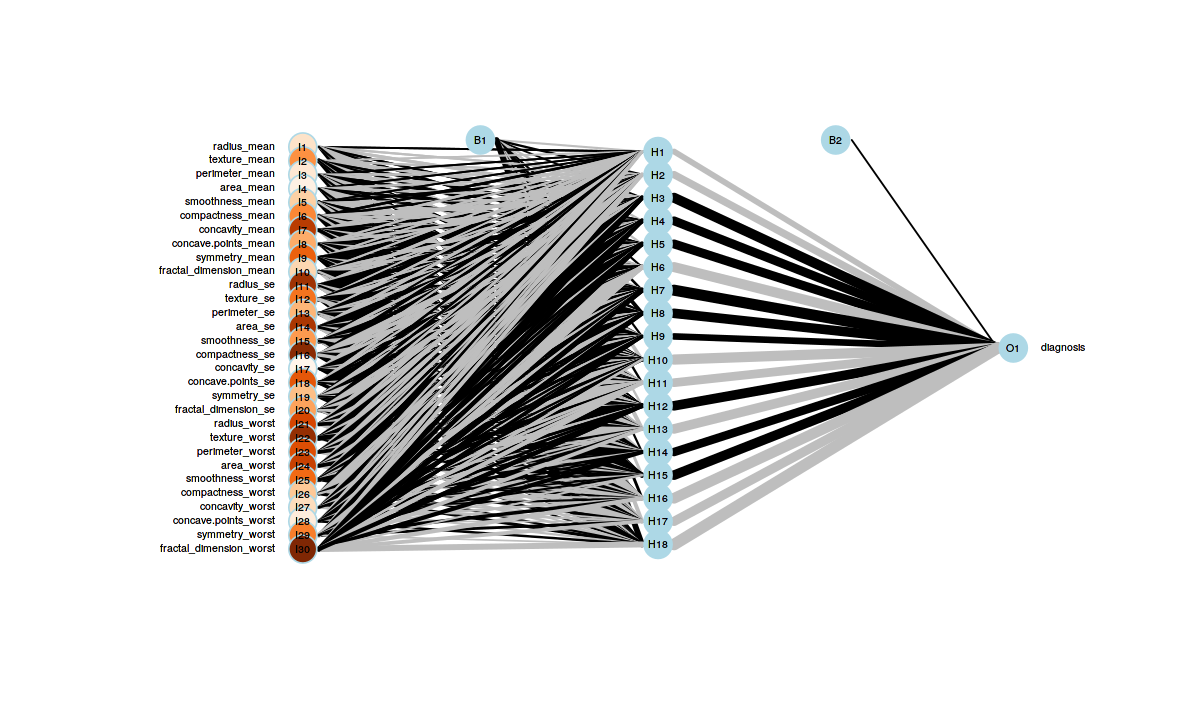

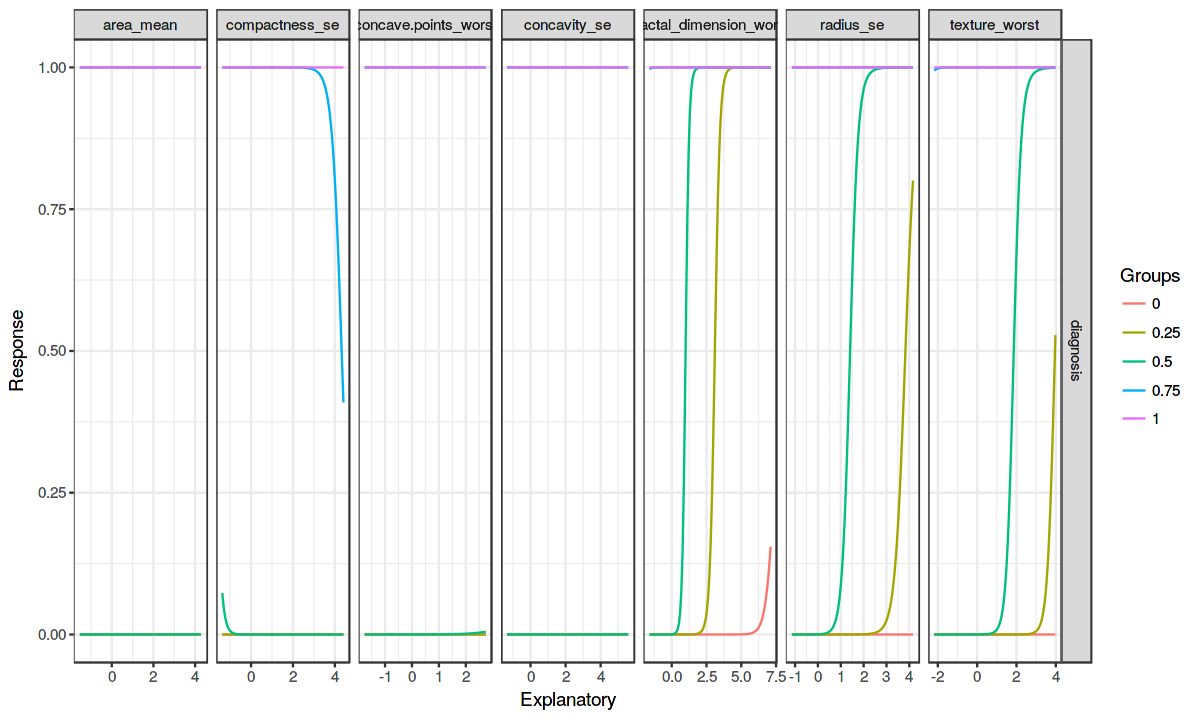

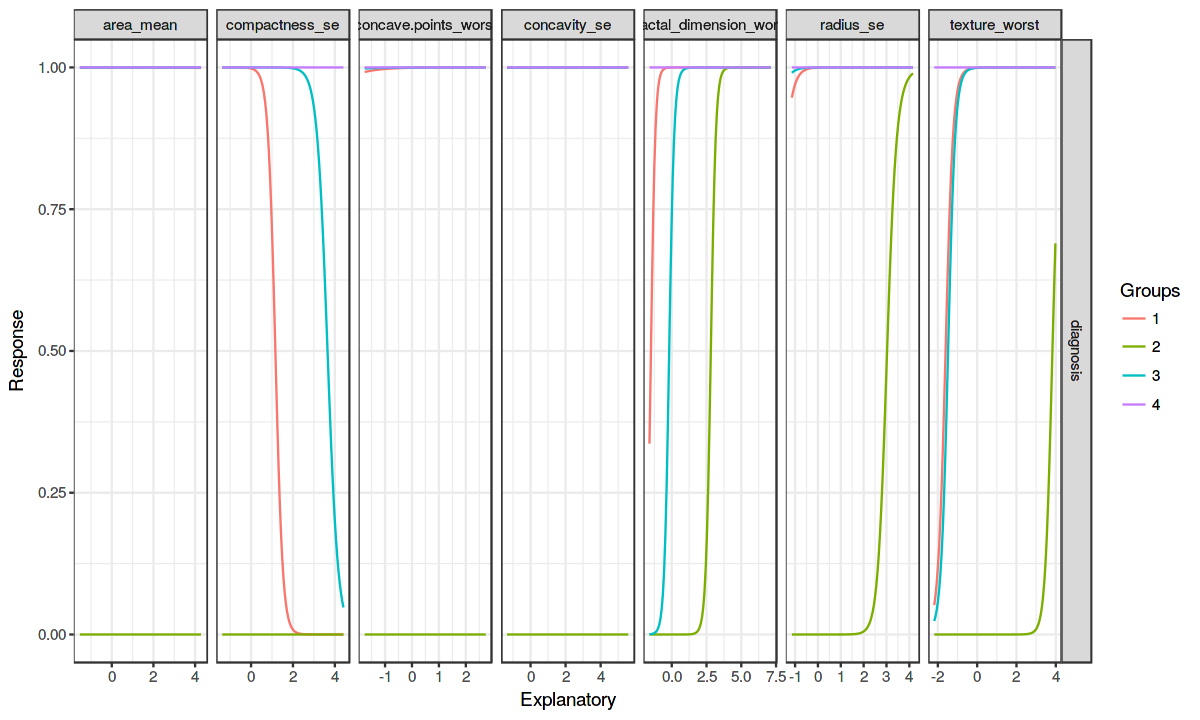

In [14]:
#select model that you would like to do sensitivity analysis on
model_number <- 18

#calculate the relative importance of the inputs in model using Garson's method
rel_imp_nnet <- garson(#Garson's method of calculating importance
        model_nnet_list[[model_number]],
        bar_plot = FALSE
       )

# set colour of input nodes based on their relative importance
cols <- colorRampPalette(brewer.pal(9,"Oranges"))(30)[rank(rel_imp_nnet)]


#widen the plots
options(repr.plot.width=10,repr.plot.height=6)

# plot network
plotnet(
    model_nnet_list[[model_number]],
    cex_val    = 0.5,
    circle_cex = 3,
    circle_col = list(cols, 'lightblue'),
    max_sp     = TRUE
    );

# Take a look at the relative importance values for each input variable, the variables have been sorted from highest to lowest relative importance.
rel_imp_nnet$variable <- row.names(rel_imp_nnet);
rel_imp_sorted <- rel_imp_nnet[order(rel_imp_nnet$rel_imp, decreasing = TRUE),]
rel_imp_sorted

# Lets profile the the top 4 variables with highest relative importance values as well as the variable with the lowest variable importance value. That is, let us see the relationship of each variable on the response.

#choose variables to analyse
plot_variables <- rel_imp_sorted$variable[c(1:4, 28:30)]

# profile each variable while holding all others at quantiles ranging from 0 to 1
lekprofile(
    model_nnet_list[[model_number]],
    xsel       = plot_variables,
    group_vals = seq(0, 1, by = 0.25),
    grp_nms    = seq(0, 1, by = 0.25)
    )

# Since covariance among the predictors can create unlikely scenarios if one holds all the other variables at the same value, one can use kmeans clustering to find natural clusters of variables and hold each variable in the cluster at a constant value equal to the mean of the cluster

#profile each variable while holding all others at the means of each cluster
lekprofile(
    model_nnet_list[[model_number]],
    xsel       = plot_variables,
    group_vals = 4
    )
